<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")


In [129]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [130]:
data = pd.read_csv("D:/Datasets/LogisticRegression/DMV_Written_Tests.csv")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
DMV_Test_1    100 non-null float64
DMV_Test_2    100 non-null float64
Results       100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [132]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data['Results'].values

### Task 3: Visualize the Data
---

[60.18259939 79.03273605 61.10666454 75.02474557 76.0987867  84.43281996
 82.30705337 69.36458876 53.97105215 69.07014406 70.66150955 76.97878373
 89.67677575 77.92409145 62.27101367 80.19018075 61.37928945 85.40451939
 52.04540477 64.17698887 83.90239366 94.44336777 77.19303493 97.77159928
 62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 97.64563396
 74.24869137 71.79646206 75.39561147 40.45755098 80.27957401 66.74671857
 64.03932042 72.34649423 60.45788574 58.84095622 99.8278578  47.26426911
 50.4581598  88.91389642 94.83450672 67.31925747 57.23870632 80.366756
 68.46852179 75.47770201 78.63542435 94.09433113 90.44855097 74.49269242
 89.84580671 83.48916274 42.26170081 99.31500881 55.34001756 74.775893  ]
[86.3085521  75.34437644 96.51142588 46.55401354 87.42056972 43.53339331
 76.4819633  97.71869196 89.20735014 52.74046973 92.92713789 47.57596365
 65.79936593 68.97235999 69.95445795 44.82162893 72.80788731 57.05198398
 69.43286012 80.90806059 56.30804622 65.56892161 70.

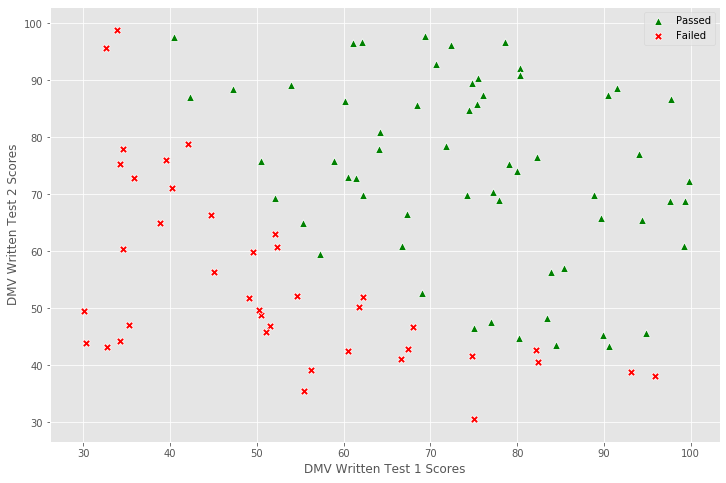

In [133]:

passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)
print(scores[passed[:, 0], 0])
print(scores[passed[:, 0], 1])
print(scores[failed[:, 0], 0])
print(scores[failed[:, 0], 1])
ax = sns.scatterplot(x = scores[passed[:, 0], 0],   #doubtful
                     y = scores[passed[:, 0], 1],
                     marker = "^",
                     color = "green",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [134]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x))

In [135]:
logistic_function(0)

0.5

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [136]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(),(y_pred - y))
    return cost[0] , gradient

### Task 6: Cost and Gradient at Initialization
---

In [137]:
mean_scores = np.mean(scores, axis=0)   #doubt forgot
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores #standardization

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Cost at initialization", cost)
print("Gradient at initialization:", gradient)

Cost at initialization 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [138]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [139]:
theta, costs = gradient_descent(X, y, theta_init, 0.75, 1000)

In [140]:
print("Theta after running gradient descent:", theta)
print("Resulting cost:", costs[-1])

Theta after running gradient descent: [[1.71096165]
 [3.97680144]
 [3.70966736]]
Resulting cost: 0.2034993160744727


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

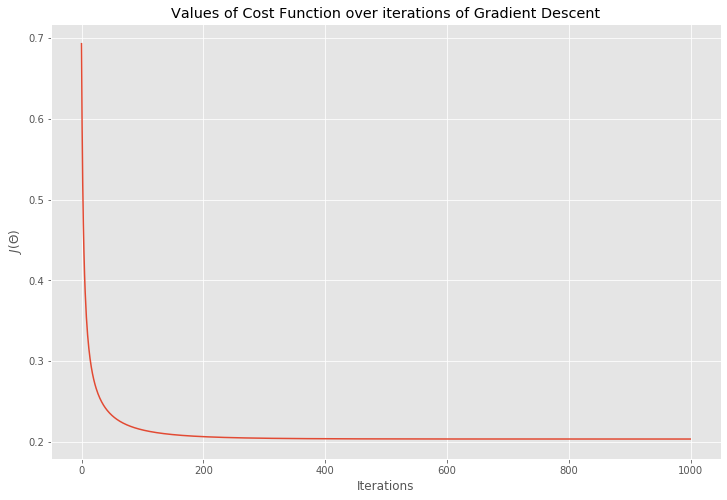

In [141]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

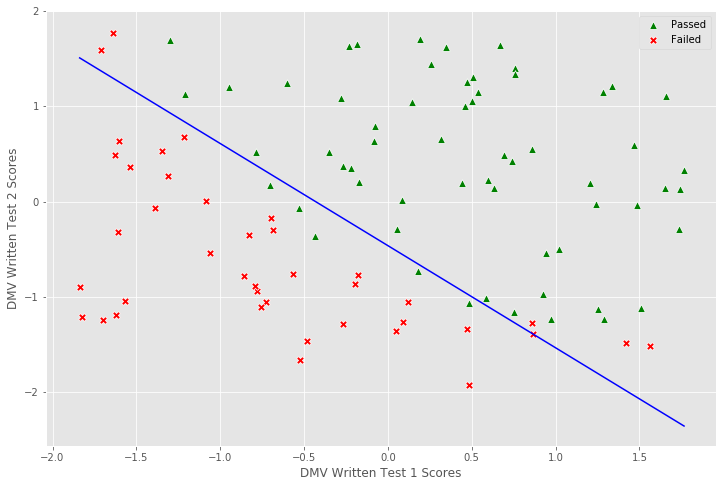

In [142]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "^",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)

ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [143]:
def predict(theta, x):
    results = logistic_function(x.dot(theta))
    return results > 0


In [144]:
p = predict(theta, X)
print("Training Accuracy:", sum(p==y)[0],"%")

Training Accuracy: 60 %


In [145]:
test = np.array([51,79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)
probability = logistic_function(test.dot(theta))
print("A person who scores 50 and 79 on their DMV written tests have a",
      np.round(probability[0], 2),"probability of passing.")

A person who scores 50 and 79 on their DMV written tests have a 0.78 probability of passing.
